# Data Wrangling 

#### Overview
#### Import modules
#### Read CSV files
#### Create a function that will turn values into integers and sum the totals for each personality trait
#### Create a function that will intepret the personality trait
#### Plot graphs based on the data
#### Classify low risk applicants and group them into a dataframe showing their department
#### Show the amount of applicants in each personality trait interpretation according to their department.

#### Importing required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import stdev

#### Reading in csv files

In [2]:
df = pd.read_csv('personality_scores.csv', delimiter=';')
df1 = pd.read_csv('personality_scores.csv', header=None, skiprows=[0], delimiter=';')

df.head()

,ID,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,IPIP_HIGH_RISK
0,0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 70 columns):
ID                                                                          1555 non-null int64
Section 5 of 6 [I am always prepared.]                                      1555 non-null object
Section 5 of 6 [I am easily disturbed.]                                     1555 non-null object
Section 5 of 6 [I am exacting (demanding) in my work.]                      1555 non-null object
Section 5 of 6 [I am full of ideas.]                                        1555 non-null object
Section 5 of 6 [I am interested in people.]                                 1555 non-null object
Section 5 of 6 [I am not interested in abstract ideas.]                     1555 non-null object
Section 5 of 6 [I am not interested in other people's problems.]            1555 non-null object
Section 5 of 6 [I am not really interested in others.]                      1555 non-null object
Section 5 of 6 [I am 

In [4]:
df_copy = df.copy()

In [5]:
df_copy = df_copy.sort_index()

#### Dropping null values

In [6]:
df1 = df_copy.dropna(axis='columns')

In [7]:
df1.set_index(keys='ID', inplace=True)
df1.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Section 5 of 6 [I often forget to put things back in their proper place],Section 5 of 6 [I pay attention to details.],Section 5 of 6 [I seldom feel blue (down).],Section 5 of 6 [I spend time reflecting on things.],Section 5 of 6 [I start conversations.],Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.]
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 5)","(4, 3)","(5, 5)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 1)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 3)","(4, 3)"
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 1)","(5, 3)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,"(3, 1)","(3, 5)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 1)","(4, 1)"
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 5)","(5, 5)","(1, 3)","(2, 3)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"


#### Creating a function that will count subscale totals

In [8]:
def string_2_tuple(row):
    from ast import literal_eval 
    for i in row:
        return literal_eval(i)
    keys = set(k for k, _ in ds)

tuple_df = df1.apply(string_2_tuple)
tuple_df.head()
df_tuple = pd.DataFrame(tuple_df)

In [9]:
from collections import defaultdict 

output = defaultdict(int) 
  
for k, v in tuple_df: 
    output[k] += v 
  
# Printing output 
print(list(output.items())) 

[(3, 48), (4, 36), (5, 42), (2, 40), (1, 30)]


In [10]:
ag_list = []
ex_list = []
ne_list = []
es_list = []
c_list = []
def counter(dframe):
    for i in df1.values:
        ag = 0
        ex = 0
        ne = 0
        es = 0
        c = 0
        for j in i:
            a = int(j[1])
            b = int(j[4])
            if a == 1:
                ex += b
            elif a == 2:
                ag += b
            elif a == 3:
                c += b
            elif a == 4:
                es +=b
            elif a == 5:
                ne += b
        ag_list.append(ag)
        ex_list.append(ex)
        ne_list.append(ne)
        es_list.append(es)
        c_list.append(c)
df_p = pd.DataFrame()
df_p.apply(counter)
df_p['Extraversion'] = ex_list
df_p['Agreeableness'] = ag_list
df_p['Openness to New Experiences'] = ne_list
df_p['Emotional Stability'] = es_list
df_p['Conscientiousness'] = c_list
df_p.head(10)

,Extraversion,Agreeableness,Openness to New Experiences,Emotional Stability,Conscientiousness
0,30,40,42,36,48
1,42,46,42,40,46
2,28,40,42,38,40
3,30,38,38,40,38
4,28,34,36,38,46
5,48,46,36,46,42
6,38,44,42,36,50
7,30,48,42,42,48
8,40,46,48,44,48
9,32,44,42,18,36


#### Calculating the means and std deviations in order to create ranges og high, medium and low for each subscale

In [11]:
extraversion_mean = df_p['Extraversion'].mean()
extraversion_stdev = stdev(df_p['Extraversion'])

agreeable_mean = df_p['Agreeableness'].mean()
agreeable_stdev = stdev(df_p['Agreeableness'])

emo_stab_mean = df_p['Emotional Stability'].mean()
emo_stab_stdev = stdev(df_p['Emotional Stability'])

consc_mean = df_p['Conscientiousness'].mean()
consc_stdev = stdev(df_p['Conscientiousness'])

new_exp_mean = df_p['Openness to New Experiences'].mean()
new_exp_stdev = stdev(df_p['Openness to New Experiences'])


In [12]:
extra_high = (extraversion_mean + extraversion_stdev)/2
extra_low = (extraversion_mean - extraversion_stdev)/2

agree_high = (agreeable_mean + agreeable_stdev)/2
agree_low = (agreeable_mean - agreeable_stdev)/2

emo_stab_high = (emo_stab_mean + emo_stab_stdev)/2
emo_stab_low = (emo_stab_mean - emo_stab_stdev)/2

consc_high = (consc_mean + consc_stdev)/2
consc_low = (consc_mean - consc_stdev)/2

new_exp_high = (new_exp_mean + new_exp_stdev)/2
new_exp_low = (new_exp_mean - new_exp_stdev)/2

#### Creating functions that will generate interpretations for each subscale

In [13]:
#Creating functions that will generate interpretations for the subscales.
def extra_interpret(dataframe):
    result = []
    for i in dataframe:
        if i in ['Extraversion']:
            for x in dataframe[i]:
                if x < extra_low:
                    result.append('low')
                elif x > extra_high:
                    result.append('high')
                else:
                    result.append('medium')
        else:
            pass
    return result

def emo_stab_interpret(dataframe):
    result = []
    for i in dataframe:
        if i in ['Emotional Stability']:
            for x in dataframe[i]:
                if x < emo_stab_low:
                    result.append('low')
                elif x > emo_stab_high:
                    result.append('high')
                else:
                    result.append('medium')
        else:
            pass
    return result        
       
def consc_interpret(dataframe):
    result = []
    for i in dataframe:
        if i in ['Conscientiousness']:
            for x in dataframe[i]:
                if x < consc_high:
                    result.append('low')
                elif x > consc_low:
                    result.append('high')
                else:
                    result.append('medium')
        else:
            pass
    return result                   
def new_exp_interpret(dataframe):
    result = []
    for i in dataframe:
        if i in ['Openness to New Experiences']:
            for x in dataframe[i]:
                if x < new_exp_low:
                    result.append('low')
                elif x > new_exp_high:
                    result.append('high')
                else:
                    result.append('medium')
        else:
            pass
    return result                   
            
def agree_interpret(dataframe):
    result = []
    for i in dataframe:
        if i in ['Agreeableness']:
            for x in dataframe[i]:
                if x < agree_low:
                    result.append('low')
                elif x > agree_high:
                    result.append('high')
                else:
                    result.append('medium')
        else:
            pass
    return result  

In [14]:
df_p['Extraversion Interpretation'] = extra_interpret(df_p)  
df_p['Emotional Stability Interpretation'] = emo_stab_interpret(df_p)
df_p['Conscientiousness Interpretation'] = consc_interpret(df_p)
df_p['Openness to New Experiences Interpretation'] = new_exp_interpret(df_p)
df_p['Agreeableness Interpretation'] = agree_interpret(df_p)

#### Reading in csv files for a new dataframe

In [15]:
depart = pd.read_csv('departments.csv',delimiter=';', index_col='ID')
depart.dropna(axis='columns')
depart.dropna(axis=1, inplace=True)


#### Joining the dataframes

In [16]:
df_new = pd.concat([df_p,depart],axis=1)
df_new.head()

,Extraversion,Agreeableness,Openness to New Experiences,Emotional Stability,Conscientiousness,Extraversion Interpretation,Emotional Stability Interpretation,Conscientiousness Interpretation,Openness to New Experiences Interpretation,Agreeableness Interpretation,Department
0,30,40,42,36,48,high,high,high,high,high,Data
1,42,46,42,40,46,high,high,high,high,high,Data
2,28,40,42,38,40,high,high,high,high,high,Data
3,30,38,38,40,38,high,high,high,high,high,Data
4,28,34,36,38,46,high,high,high,high,high,Data


In [17]:
df_new['Department'] = df_new['Department'].str.replace(';','d',regex=True)
df_new.replace(to_replace='Web dev',value='Web Dev')

df_new.head(10)


,Extraversion,Agreeableness,Openness to New Experiences,Emotional Stability,Conscientiousness,Extraversion Interpretation,Emotional Stability Interpretation,Conscientiousness Interpretation,Openness to New Experiences Interpretation,Agreeableness Interpretation,Department
0,30,40,42,36,48,high,high,high,high,high,Data
1,42,46,42,40,46,high,high,high,high,high,Data
2,28,40,42,38,40,high,high,high,high,high,Data
3,30,38,38,40,38,high,high,high,high,high,Data
4,28,34,36,38,46,high,high,high,high,high,Data
5,48,46,36,46,42,high,high,high,high,high,Data
6,38,44,42,36,50,high,high,high,high,high,Data
7,30,48,42,42,48,high,high,high,high,high,Data
8,40,46,48,44,48,high,high,high,high,high,Data
9,32,44,42,18,36,high,medium,high,high,high,Data


In [18]:
df_new.replace(to_replace='Web dev',value='Web Dev')
data = df_new[df_new['Department'].str.contains("Data")]
strat = df_new[df_new['Department'].str.contains("Strategy")]
copy = df_new[df_new['Department'].str.contains("Copywriting")]
design = df_new[df_new['Department'].str.contains("Design")]
web = df_new[df_new['Department'].str.contains("Web Dev")]


## Extraversion Scores

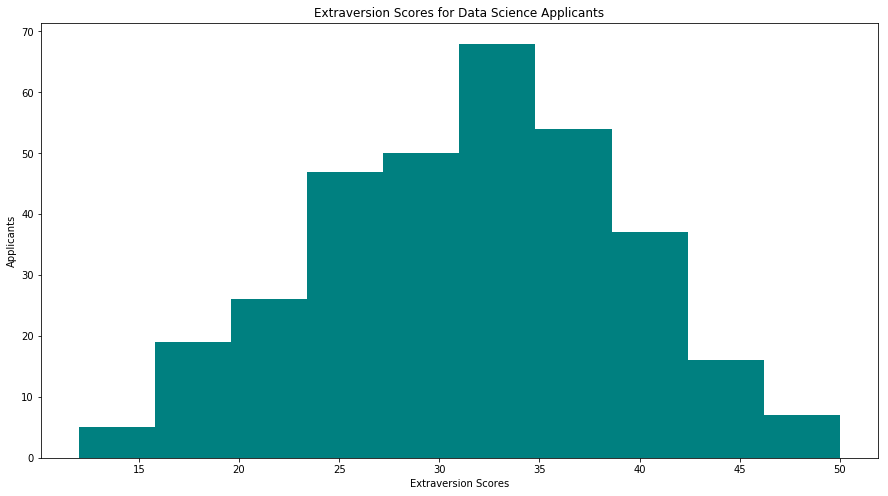

In [19]:
plt.figure(figsize=(15,8))
plt.hist(data['Extraversion'],bins=10,color='teal')
plt.xlabel('Extraversion Scores')
plt.ylabel('Applicants')
plt.title('Extraversion Scores for Data Science Applicants')
plt.show()

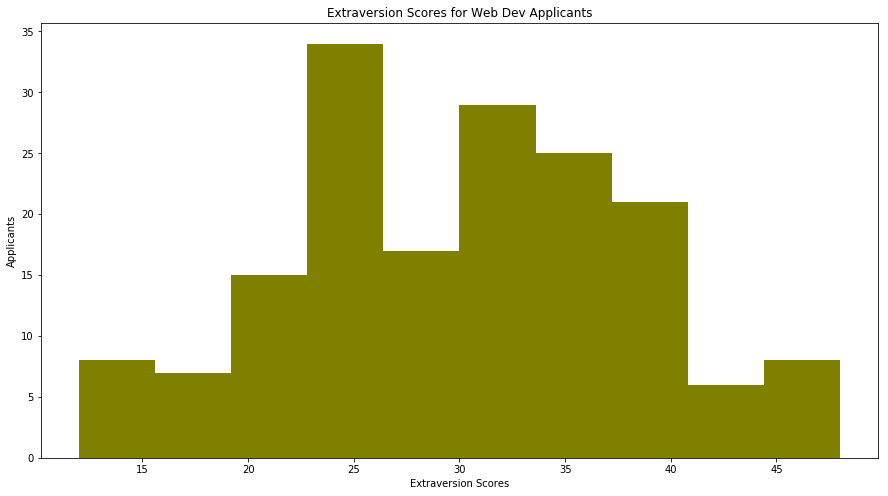

In [20]:
plt.figure(figsize=(15,8))
plt.hist(web['Extraversion'],bins=10,color='olive')
plt.xlabel('Extraversion Scores')
plt.ylabel('Applicants')
plt.title('Extraversion Scores for Web Dev Applicants')
plt.show()

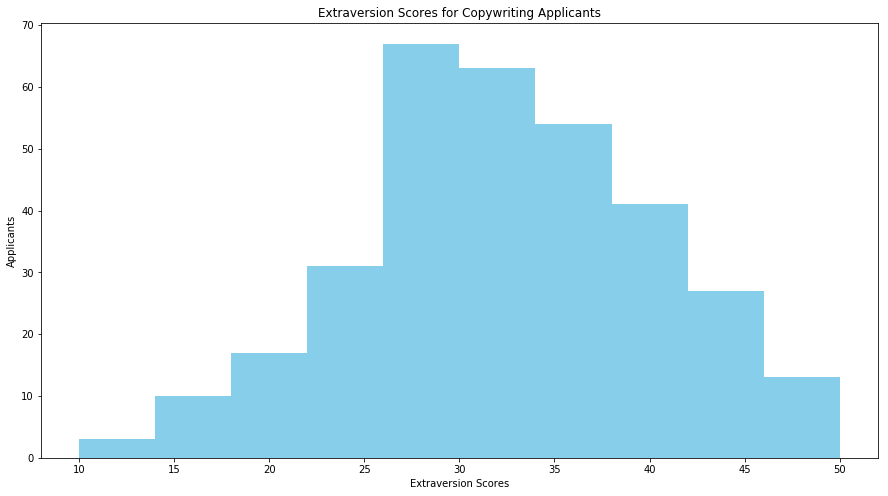

In [21]:
plt.figure(figsize=(15,8))
plt.hist(copy['Extraversion'],bins=10,color='skyblue')
plt.xlabel('Extraversion Scores')
plt.ylabel('Applicants')
plt.title('Extraversion Scores for Copywriting Applicants')
plt.show()

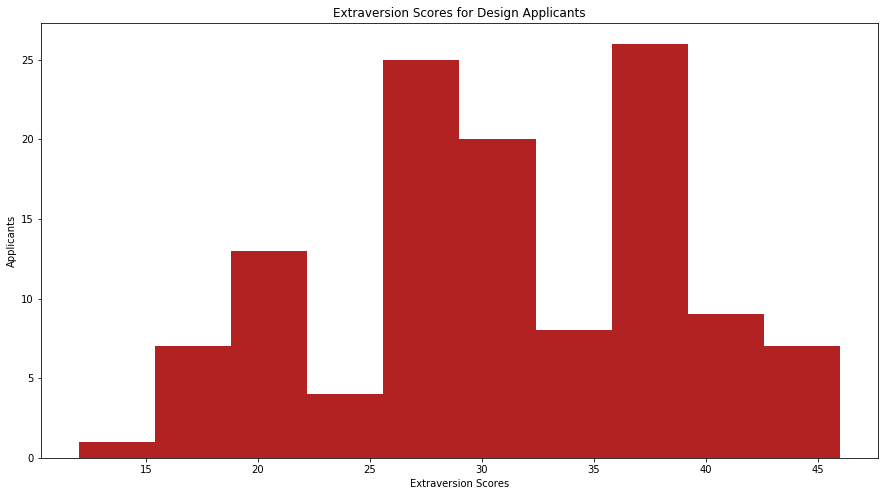

In [22]:
plt.figure(figsize=(15,8))
plt.hist(design['Extraversion'],bins=10,color='firebrick')
plt.xlabel('Extraversion Scores')
plt.ylabel('Applicants')
plt.title('Extraversion Scores for Design Applicants')
plt.show()

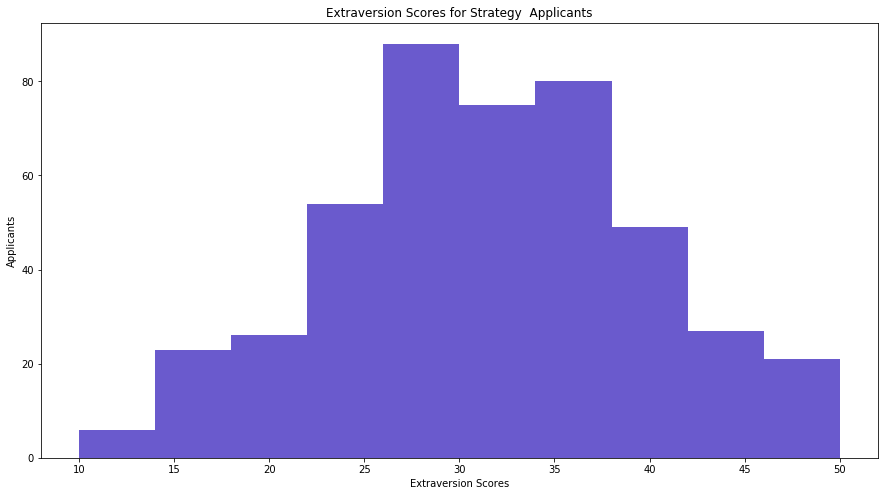

In [23]:
plt.figure(figsize=(15,8))
plt.hist(strat['Extraversion'],bins=10,color='slateblue')
plt.xlabel('Extraversion Scores')
plt.ylabel('Applicants')
plt.title('Extraversion Scores for Strategy  Applicants')
plt.show()

## Emotional Stability Scores

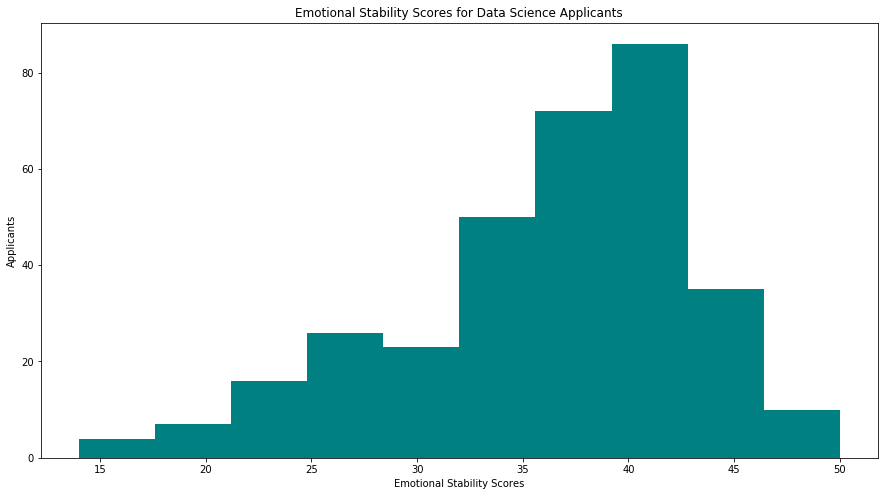

In [24]:
plt.figure(figsize=(15,8))
plt.hist(data['Emotional Stability'],bins=10,color='teal')
plt.xlabel('Emotional Stability Scores')
plt.ylabel('Applicants')
plt.title('Emotional Stability Scores for Data Science Applicants')
plt.show()

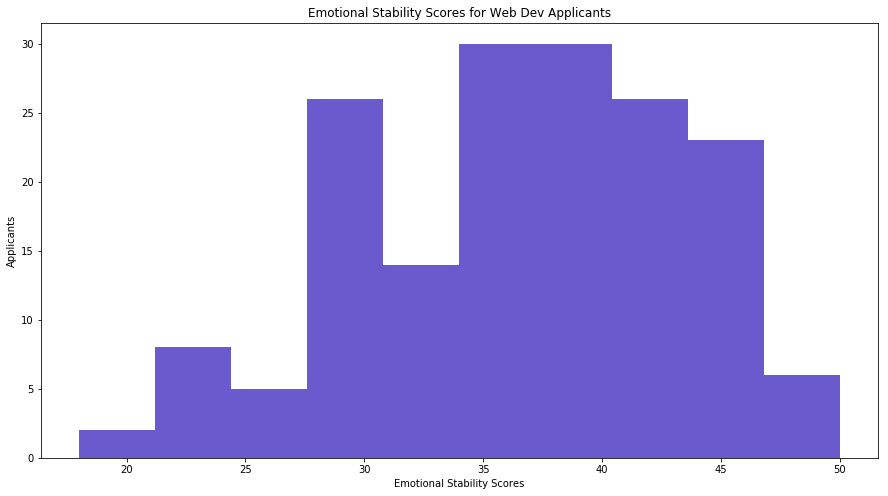

In [25]:
plt.figure(figsize=(15,8))
plt.hist(web['Emotional Stability'],bins=10,color='slateblue')
plt.xlabel('Emotional Stability Scores')
plt.ylabel('Applicants')
plt.title('Emotional Stability Scores for Web Dev Applicants')
plt.show()

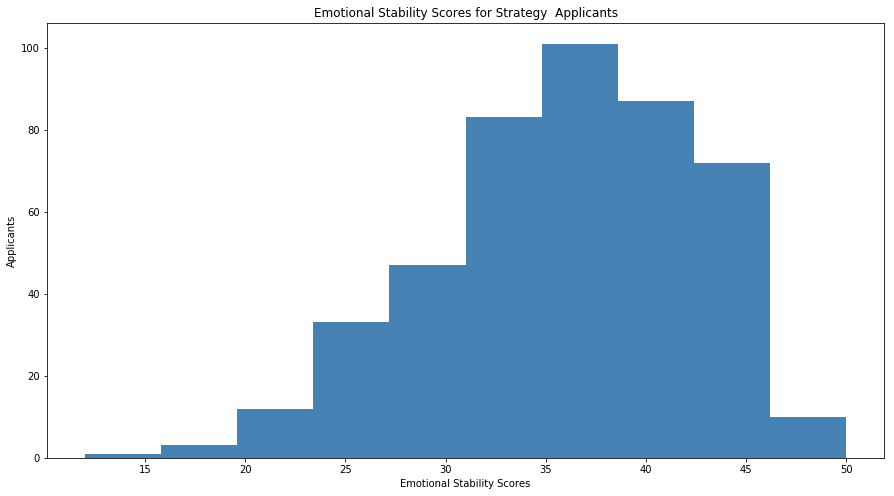

In [26]:
plt.figure(figsize=(15,8))
plt.hist(strat['Emotional Stability'],bins=10,color='steelblue')
plt.xlabel('Emotional Stability Scores')
plt.ylabel('Applicants')
plt.title('Emotional Stability Scores for Strategy  Applicants')
plt.show()

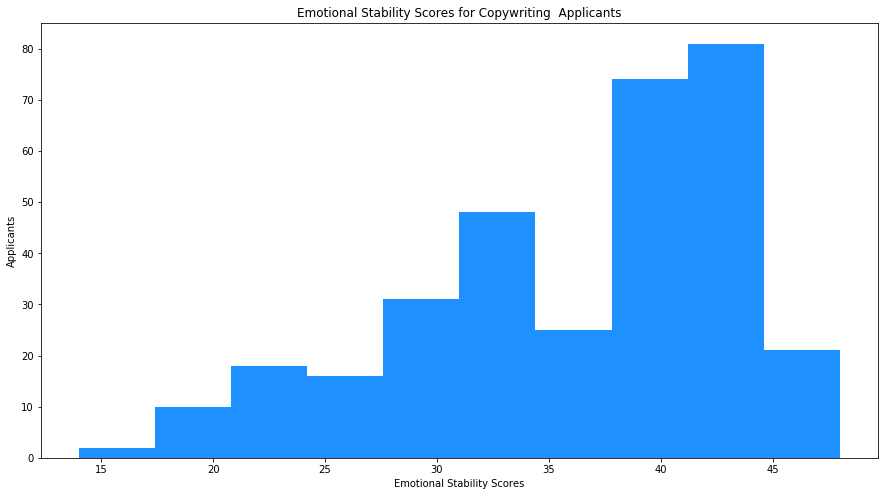

In [27]:
plt.figure(figsize=(15,8))
plt.hist(copy['Emotional Stability'],bins=10,color='dodgerblue')
plt.xlabel('Emotional Stability Scores')
plt.ylabel('Applicants')
plt.title('Emotional Stability Scores for Copywriting  Applicants')
plt.show()

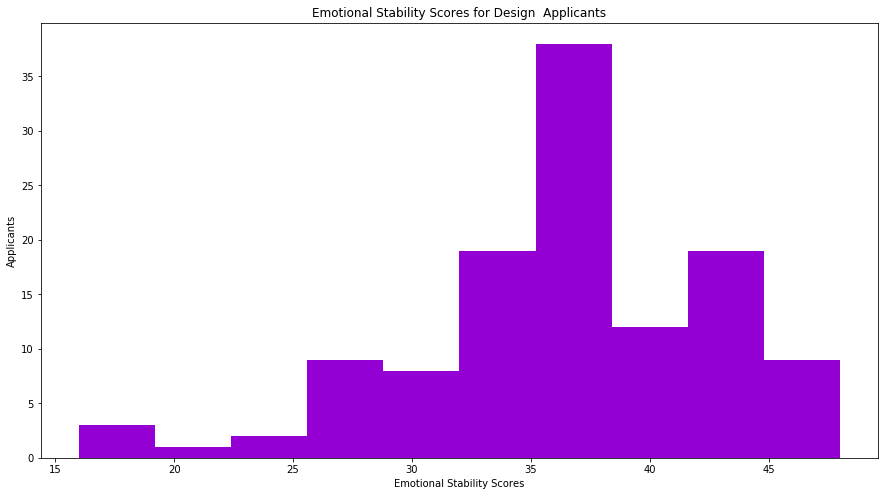

In [28]:
plt.figure(figsize=(15,8))
plt.hist(design['Emotional Stability'],bins=10,color='darkviolet')
plt.xlabel('Emotional Stability Scores')
plt.ylabel('Applicants')
plt.title('Emotional Stability Scores for Design  Applicants')
plt.show()

## Conscientiousness Scores

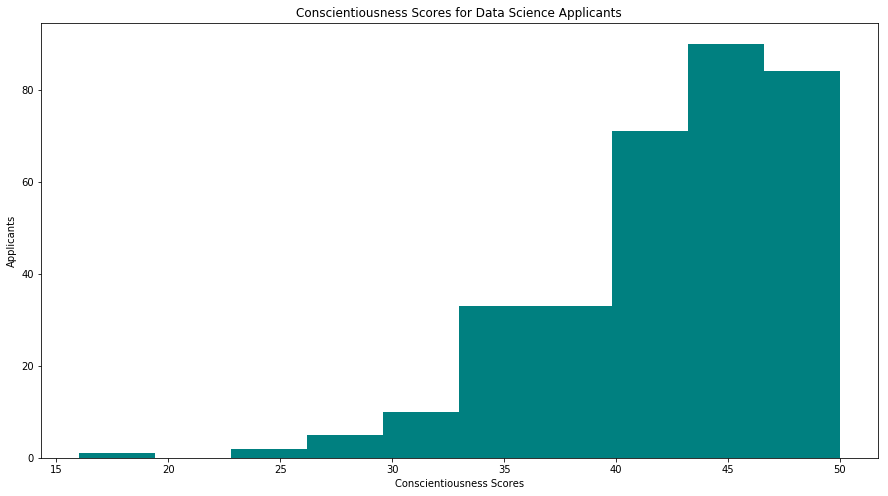

In [29]:
plt.figure(figsize=(15,8))
plt.hist(data['Conscientiousness'],bins=10,color='teal')
plt.xlabel('Conscientiousness Scores')
plt.ylabel('Applicants')
plt.title('Conscientiousness Scores for Data Science Applicants')
plt.show()

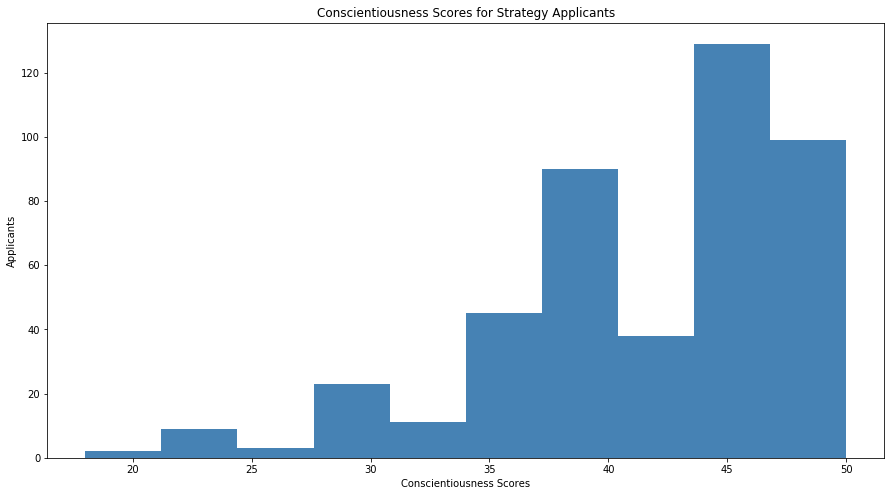

In [30]:
plt.figure(figsize=(15,8))
plt.hist(strat['Conscientiousness'],bins=10,color='steelblue')
plt.xlabel('Conscientiousness Scores')
plt.ylabel('Applicants')
plt.title('Conscientiousness Scores for Strategy Applicants')
plt.show()

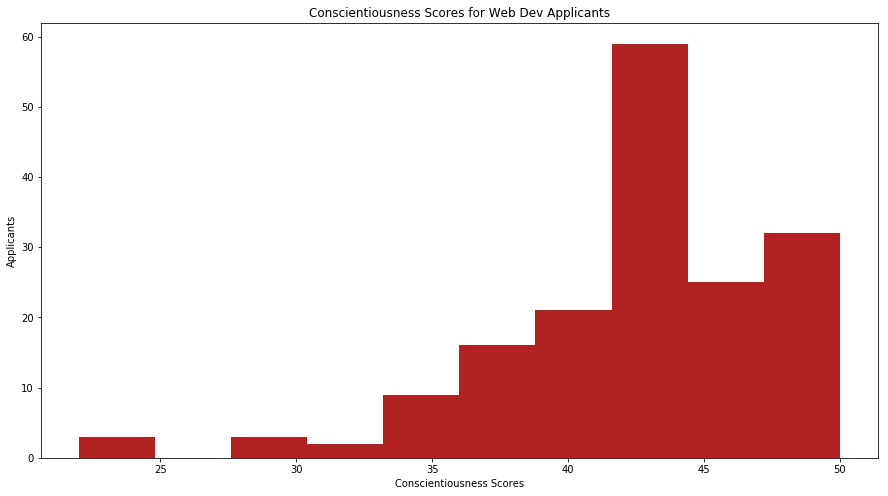

In [31]:
plt.figure(figsize=(15,8))
plt.hist(web['Conscientiousness'],bins=10,color='firebrick')
plt.xlabel('Conscientiousness Scores')
plt.ylabel('Applicants')
plt.title('Conscientiousness Scores for Web Dev Applicants')
plt.show()

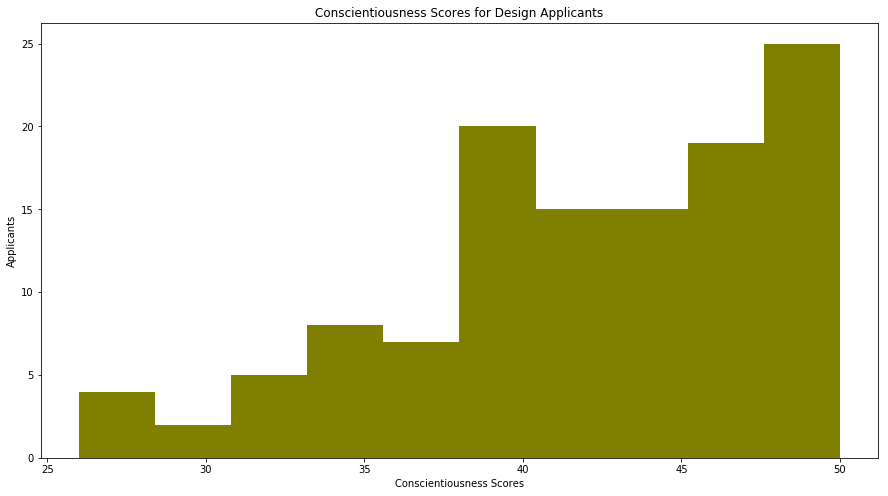

In [32]:
plt.figure(figsize=(15,8))
plt.hist(design['Conscientiousness'],bins=10,color='olive')
plt.xlabel('Conscientiousness Scores')
plt.ylabel('Applicants')
plt.title('Conscientiousness Scores for Design Applicants')
plt.show()

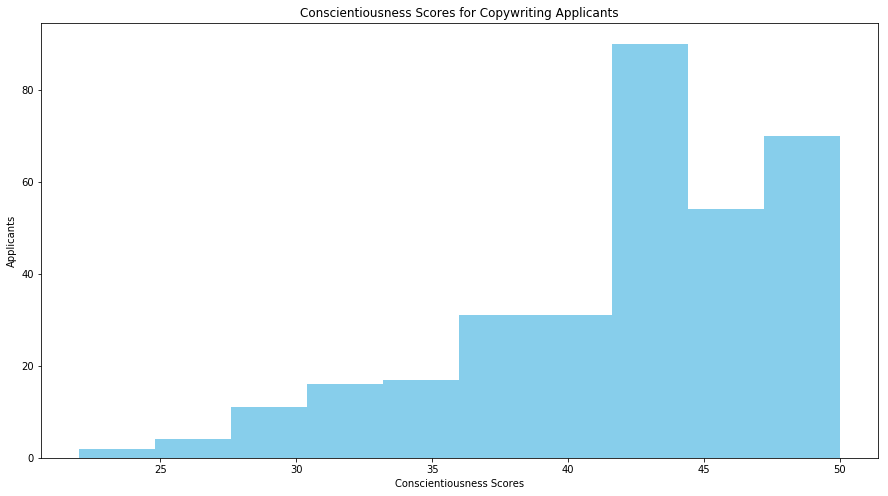

In [33]:
plt.figure(figsize=(15,8))
plt.hist(copy['Conscientiousness'],bins=10,color='skyblue')
plt.xlabel('Conscientiousness Scores')
plt.ylabel('Applicants')
plt.title('Conscientiousness Scores for Copywriting Applicants')
plt.show()

## Agreeableness Scores

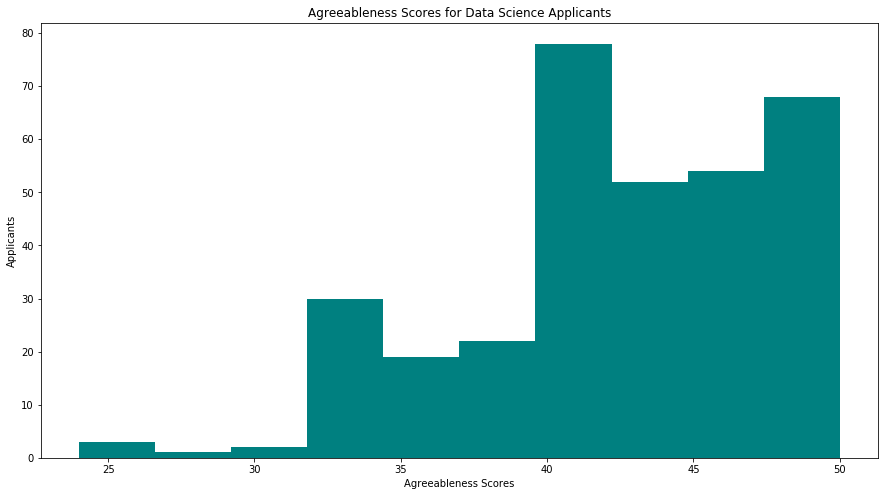

In [34]:
plt.figure(figsize=(15,8))
plt.hist(data['Agreeableness'],bins=10,color='teal')
plt.xlabel('Agreeableness Scores')
plt.ylabel('Applicants')
plt.title('Agreeableness Scores for Data Science Applicants')
plt.show()

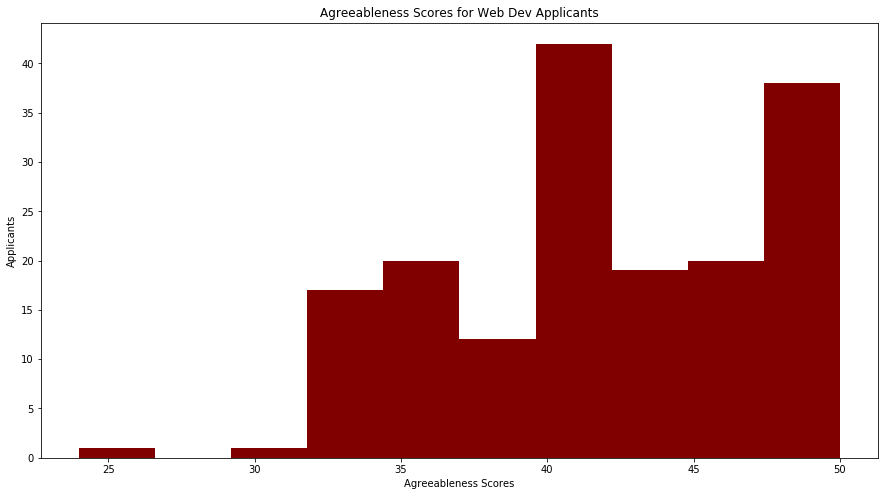

In [35]:
plt.figure(figsize=(15,8))
plt.hist(web['Agreeableness'],bins=10,color='maroon')
plt.xlabel('Agreeableness Scores')
plt.ylabel('Applicants')
plt.title('Agreeableness Scores for Web Dev Applicants')
plt.show()

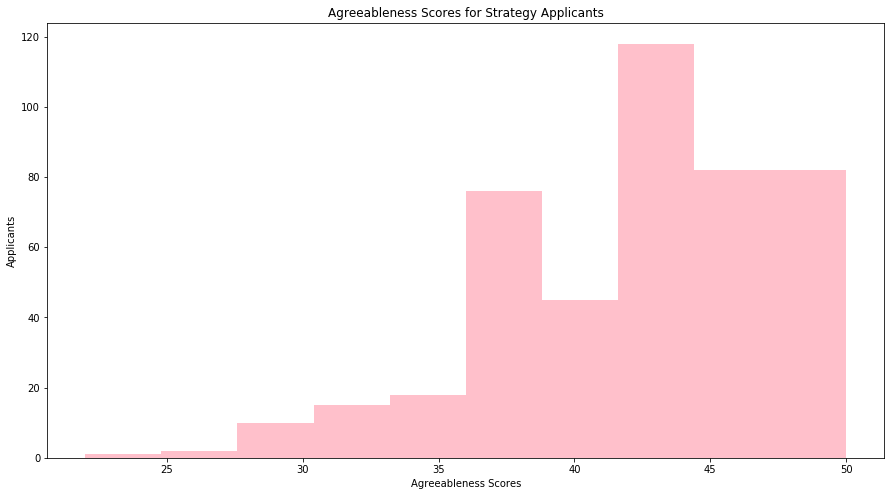

In [36]:
plt.figure(figsize=(15,8))
plt.hist(strat['Agreeableness'],bins=10,color='pink')
plt.xlabel('Agreeableness Scores')
plt.ylabel('Applicants')
plt.title('Agreeableness Scores for Strategy Applicants')
plt.show()

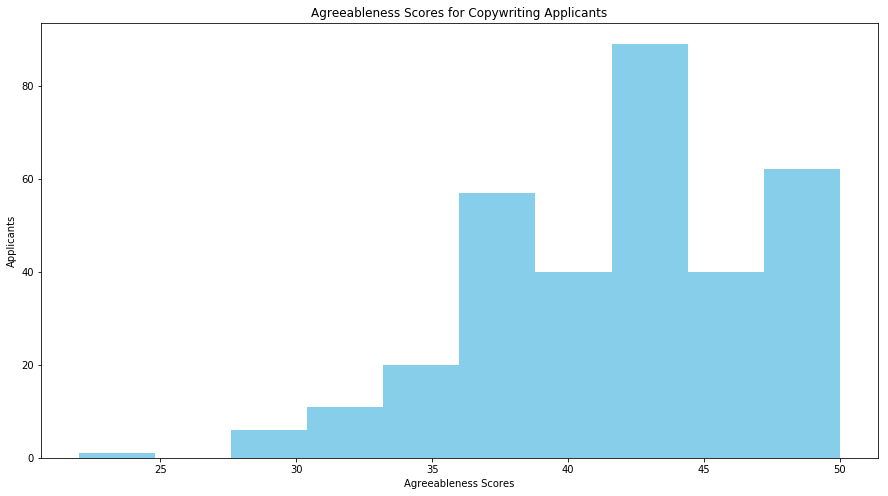

In [37]:
plt.figure(figsize=(15,8))
plt.hist(copy['Agreeableness'],bins=10,color='skyblue')
plt.xlabel('Agreeableness Scores')
plt.ylabel('Applicants')
plt.title('Agreeableness Scores for Copywriting Applicants')
plt.show()

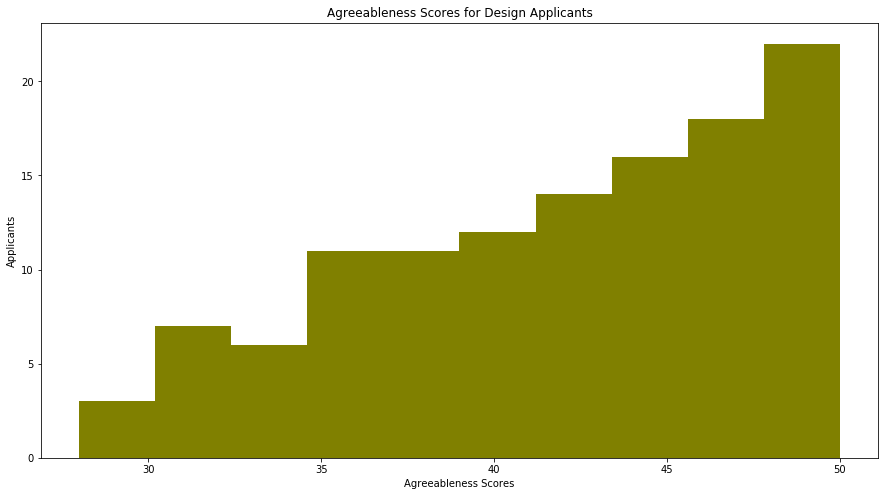

In [38]:
plt.figure(figsize=(15,8))
plt.hist(design['Agreeableness'],bins=10,color='olive')
plt.xlabel('Agreeableness Scores')
plt.ylabel('Applicants')
plt.title('Agreeableness Scores for Design Applicants')
plt.show()

## Openness to New Experiences Scores

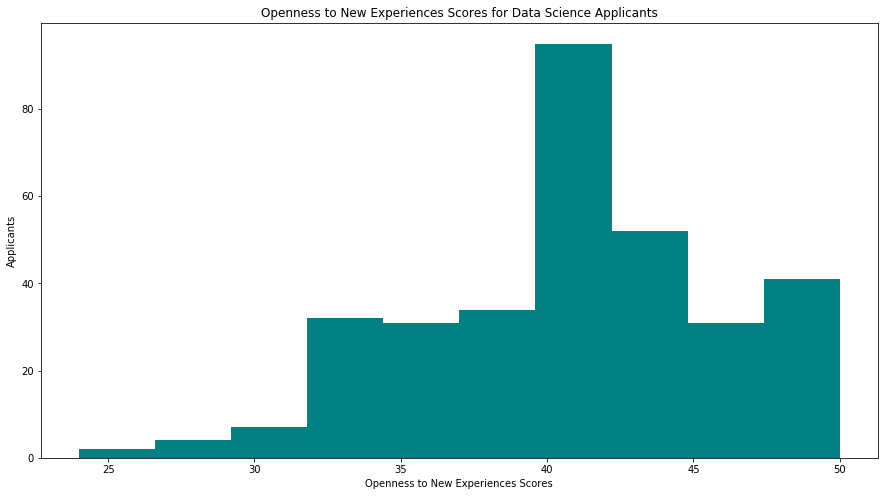

In [39]:
plt.figure(figsize=(15,8))
plt.hist(data['Openness to New Experiences'],bins=10,color='teal')
plt.xlabel('Openness to New Experiences Scores')
plt.ylabel('Applicants')
plt.title('Openness to New Experiences Scores for Data Science Applicants')
plt.show()

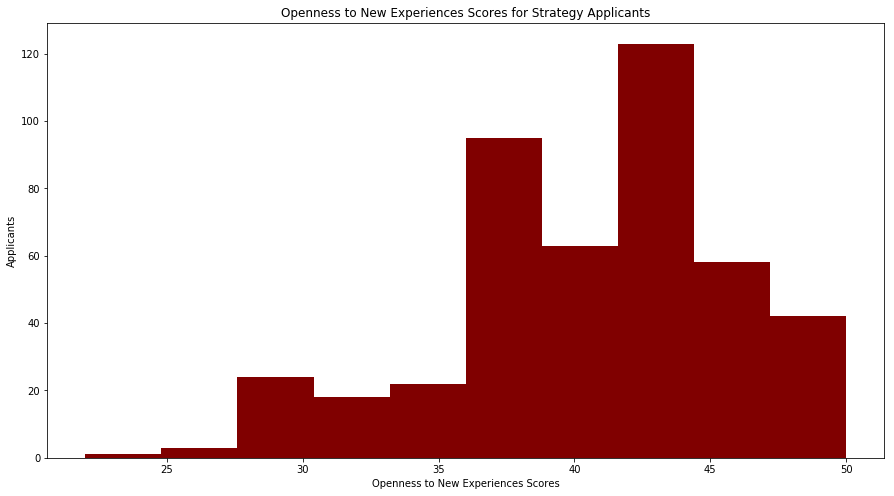

In [40]:
plt.figure(figsize=(15,8))
plt.hist(strat['Openness to New Experiences'],bins=10,color='maroon')
plt.xlabel('Openness to New Experiences Scores')
plt.ylabel('Applicants')
plt.title('Openness to New Experiences Scores for Strategy Applicants')
plt.show()

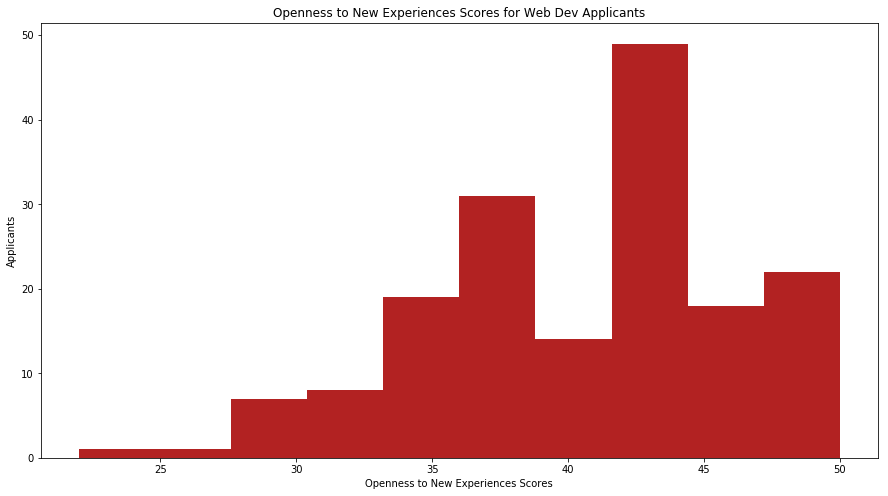

In [41]:
plt.figure(figsize=(15,8))
plt.hist(web['Openness to New Experiences'],bins=10,color='firebrick')
plt.xlabel('Openness to New Experiences Scores')
plt.ylabel('Applicants')
plt.title('Openness to New Experiences Scores for Web Dev Applicants')
plt.show()

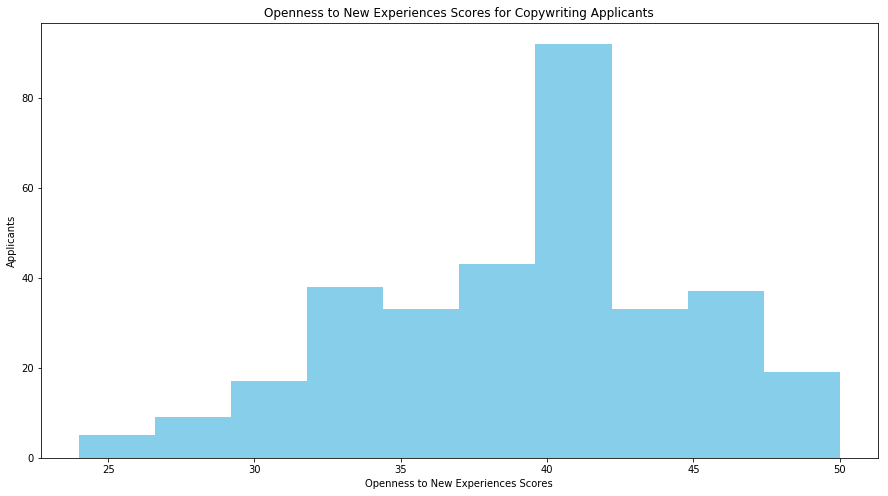

In [42]:
plt.figure(figsize=(15,8))
plt.hist(copy['Openness to New Experiences'],bins=10,color='skyblue')
plt.xlabel('Openness to New Experiences Scores')
plt.ylabel('Applicants')
plt.title('Openness to New Experiences Scores for Copywriting Applicants')
plt.show()

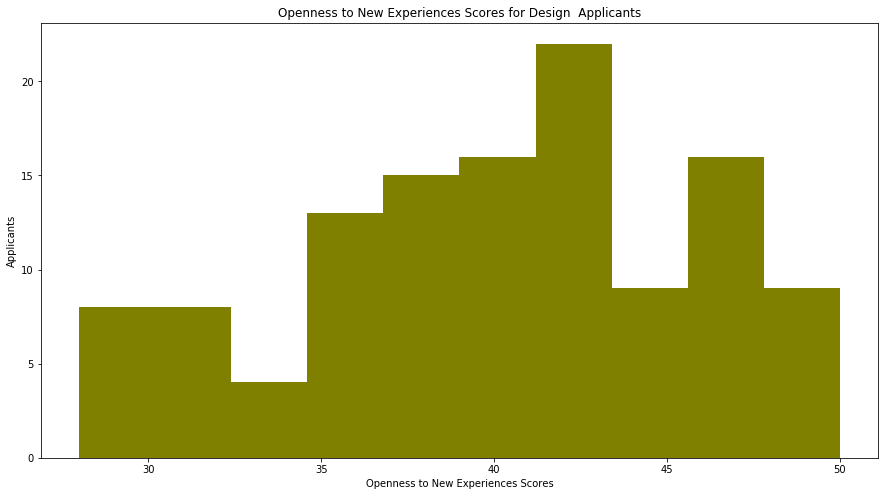

In [43]:
plt.figure(figsize=(15,8))
plt.hist(design['Openness to New Experiences'],bins=10,color='olive')
plt.xlabel('Openness to New Experiences Scores')
plt.ylabel('Applicants')
plt.title('Openness to New Experiences Scores for Design  Applicants')
plt.show()

## Classifying high risk applicants

In [44]:
ext = df_new['Emotional Stability'] < emo_stab_low
agr = df_new['Agreeableness'] < agree_low 
con = df_new['Conscientiousness'] < consc_low
risk = pd.DataFrame()

r = df_new[ext] 
s =df_new[con]
a = r.append(s)
a['high_risk'] = ['high_risk','high_risk','high_risk','high_risk','high_risk','high_risk','high_risk']
a.drop(['Extraversion','Agreeableness','Openness to New Experiences','Emotional Stability','Conscientiousness','Extraversion Interpretation','Emotional Stability Interpretation','Conscientiousness Interpretation','Openness to New Experiences Interpretation','Agreeableness Interpretation'],axis=1)


,Department,high_risk
18,Data,high_risk
27,Data,high_risk
663,Strategy,high_risk
1154,Copywriting,high_risk
526,Strategy,high_risk
584,Strategy,high_risk
960,Data,high_risk


In [270]:
con_int = df_new[['Conscientiousness Interpretation','Extraversion Interpretation','Openness to New Experiences Interpretation','Agreeableness Interpretation','Emotional Stability Interpretation','Department','Extraversion']]
con_int['Department'] = con_int['Department'].str.upper()



/home/madi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [271]:
con_int.head()

,Conscientiousness Interpretation,Extraversion Interpretation,Openness to New Experiences Interpretation,Agreeableness Interpretation,Emotional Stability Interpretation,Department,Extraversion
0,high,high,high,high,high,DATA,30
1,high,high,high,high,high,DATA,42
2,high,high,high,high,high,DATA,28
3,high,high,high,high,high,DATA,30
4,high,high,high,high,high,DATA,28


In [266]:
#A list of personality traits that will be used in the new df.
nl = ['Emotional Stability',
      'Extraversion',
     'Conscientiousness',
     'Openness to New Experiences',
     'Agreeableness']


#Creating an empty dataframe where I will pass the traits where applicants had low scores.
xdf = pd.DataFrame()


for i in nl:
    x = pd.pivot_table(con_int,index=i + ' Interpretation',columns='Department',values='Extraversion',aggfunc='count', fill_value=0)
    x['Subscale'] = i
    xdf = pd.concat([xdf, x])    
xdf.reset_index(inplace=True)
xdf = xdf[xdf['index'] == 'low']
xdf = xdf.drop('index',axis=1)
xdf = xdf.set_index('Subscale')
xdf

Department,COPYWRITING,DATA,DESIGN,STRATEGY,WEB DEV
Subscale,,,,,
Emotional Stability,1,2,0,1,0
Extraversion,1,0,0,2,0
Conscientiousness,2,1,0,11,4


#### The xdf dataframe shows the amount of applicants who scored low on any personality trait. This dataframe shows that for personality traits such as 'Agreeableness' and 'Openness to New Experiences' there were no low scoring applicants. The strategy department has the highest number of low scoring applicants while the design department has no low scoring applicants. The remaining departments have on average 4 low scoring applicants.    
